## Predict NOX(Nitric oxides concentration) and MEDV (Median home value)


### Problem :
Predict NOX(Nitric oxides concentration) and MEDV (Median housing price) using Boston dataset.

### Dataset information:
There are 506 rows and 14 attributes for each row of the dataset. They are:

`CRIM` - per capita crime rate by town

`ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.

`INDUS` - proportion of non-retail business acres per town.

`CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

`NOX` - nitric oxides concentration (parts per 10 million)

`RM` - average number of rooms per dwelling

`AGE` - proportion of owner-occupied units built prior to 1940

`DIS` - weighted distances to five Boston employment centres

`RAD` - index of accessibility to radial highways

`TAX` - full-value property-tax rate

`PTRATIO` - pupil-teacher ratio by town

`B` -  B is the proportion of blacks by town

`LSTAT` - % lower status of the population

`MEDV` - Median value of owner-occupied homes 

### Solution
Firstly, We will create a model which will predict the NOX. 

Secondly, We will create a model which will predict the Median price of house MEDV.

### Imports all the required libraries 

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

from sklearn.metrics import accuracy_score, r2_score
from sklearn.feature_selection import SelectKBest, f_regression 
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


### Import the dataset

In [2]:
# Load the dataset
df = pd.read_csv('Boston.csv')

#As the coulmn Id is of no use, we will drop it from the data-frame.
df = df.drop('Id', axis = 1)

df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


According to above observation, all the features are numerical.

In [4]:
# checking for any data with null value/missing value
missing_val = df.isnull().sum().sort_values(ascending = False)
percentage_of_missing_val = (missing_val/len(df))*100
pd.concat([missing_val, percentage_of_missing_val], axis = 1, keys= ['Missing Values', '% Missing Value'])

,Missing Values,% Missing Value
MEDV,0,0.0
LSTAT,0,0.0
B,0,0.0
PTRATIO,0,0.0
TAX,0,0.0
RAD,0,0.0
DIS,0,0.0
AGE,0,0.0
RM,0,0.0
NOX,0,0.0


According to above observation, their is no missing/null values in the dataset.

In [5]:
# describing the data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Exploratory Data Analysis (EDA) 

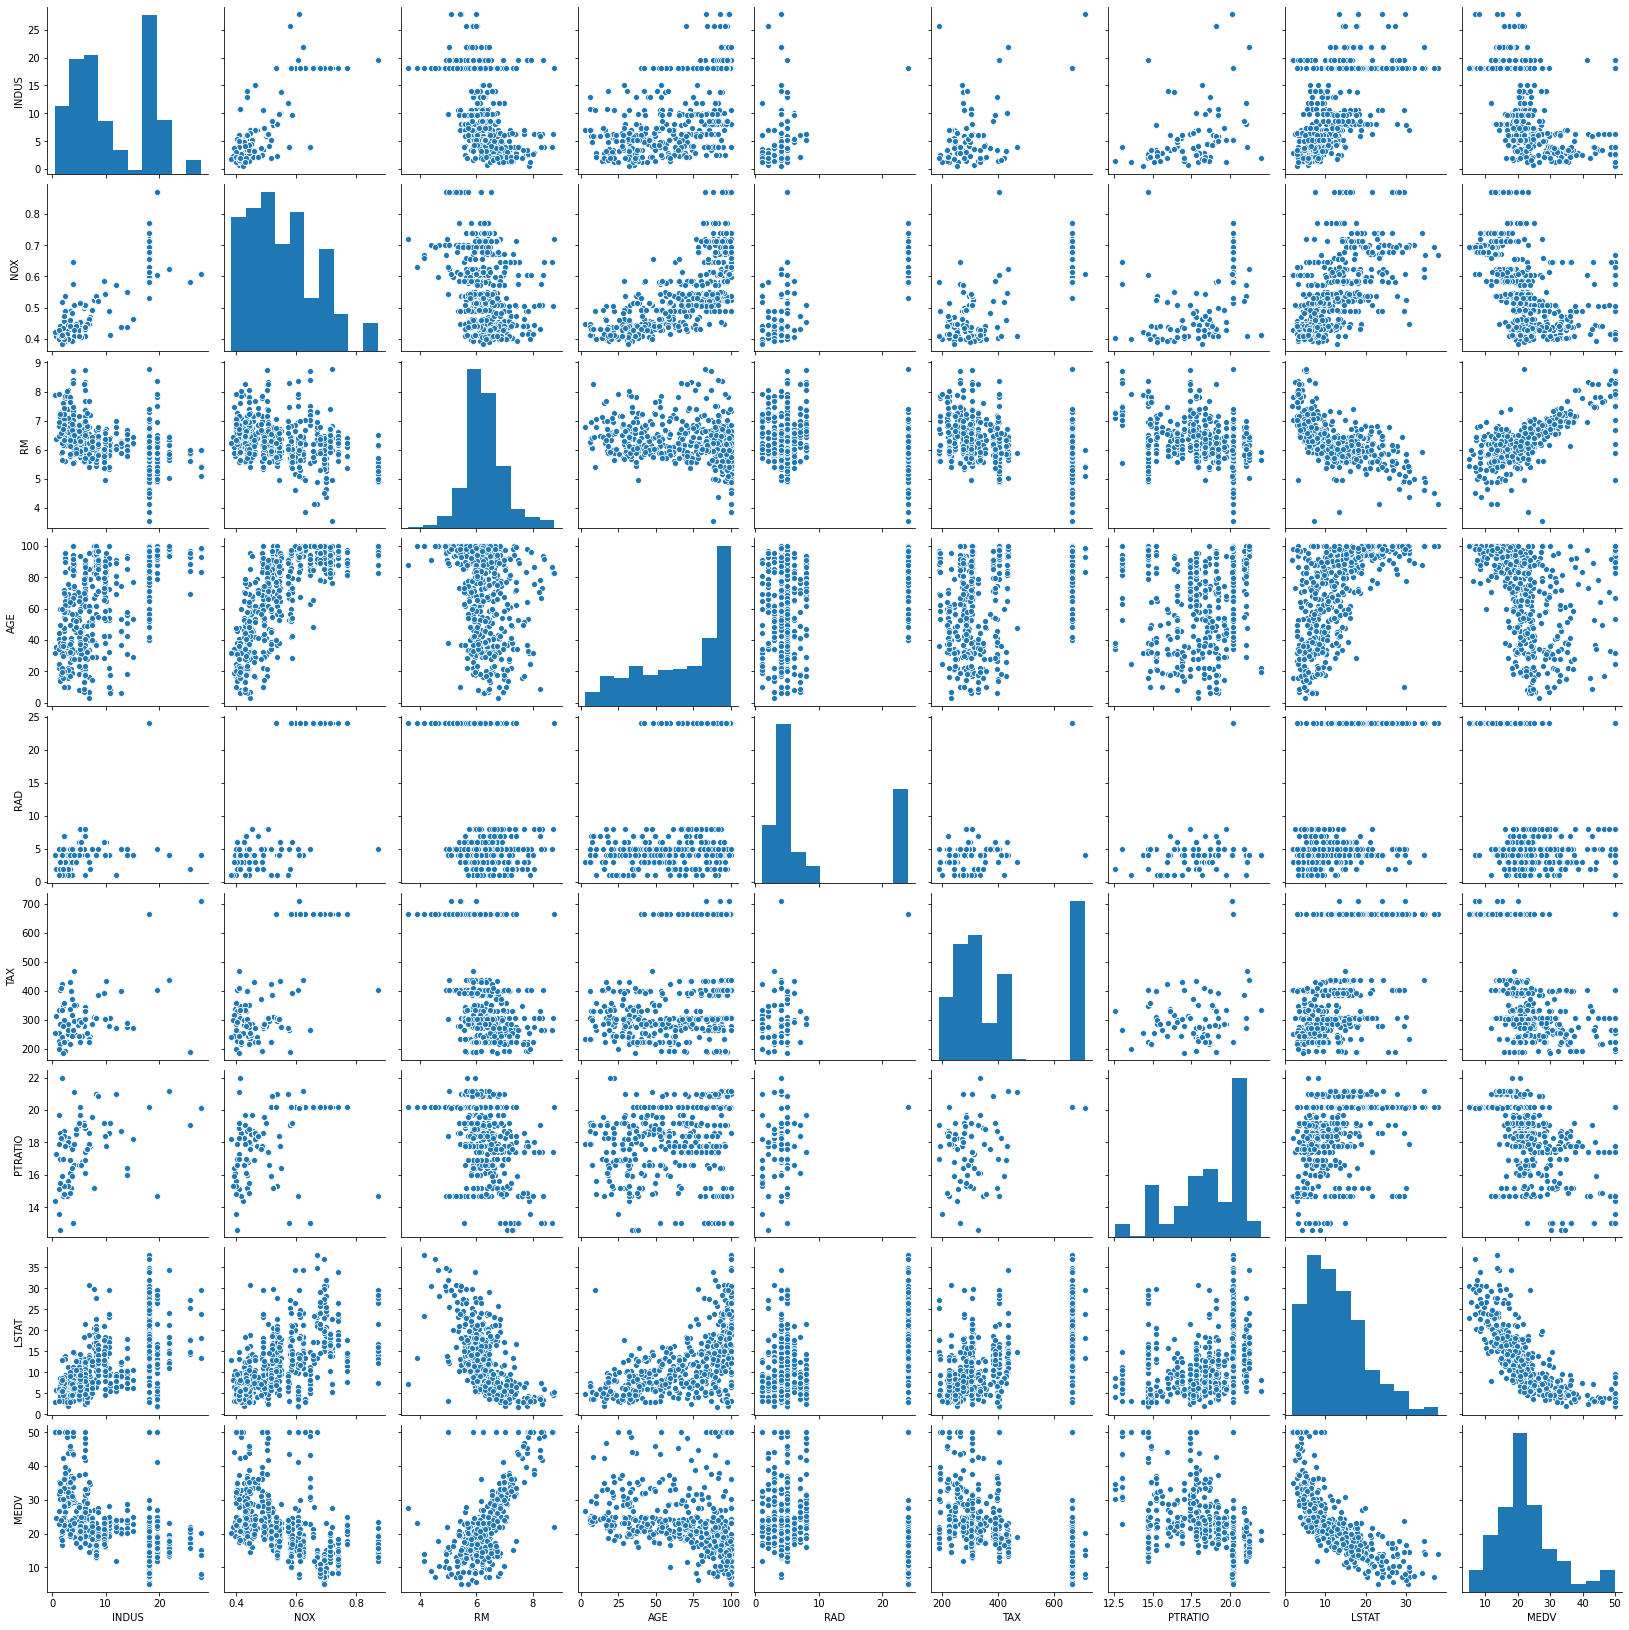

In [6]:
#The correlation of some of features with our predictive variable - Houese Price(MEDV) and NOX.
df1 = df[['INDUS','NOX','RM','AGE','RAD','TAX','PTRATIO','LSTAT','MEDV']]

# print the pairplot for df1 dataframe
sns.pairplot(df1)
#plt.show()

According to above observation,most of the features has skewed data with respect to `NOX` and `MEDV`. And also each feature has different scale range.

### Co-relation between the features

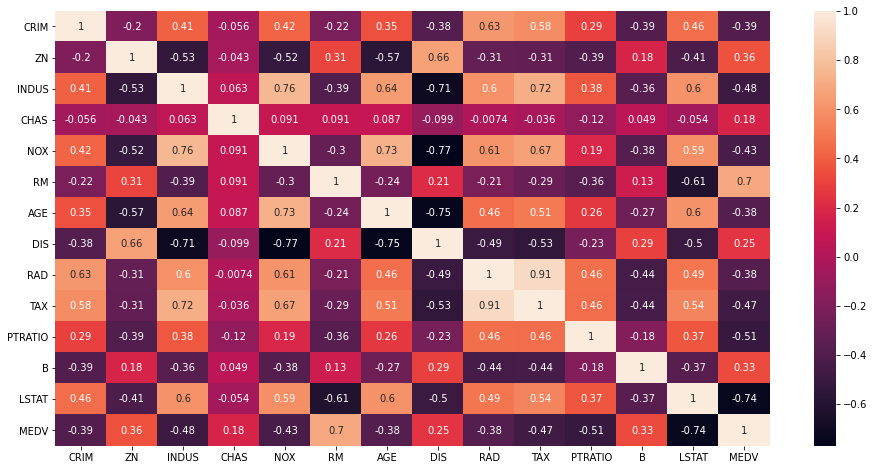

In [7]:
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[np.object]).columns

# heatmap
plt.figure(figsize=(16,8))
sns.heatmap(df[numerical_features].corr(),annot=True)
plt.show()

According to above observation: 
- LSTAT, TAX, RAD, DIS, AGE, INDUS and ZN very good co-relative with `NOX` 
- INDUS, NOX, RM, TAX, PTRATIO and LSTAT are very good co-relative with `MEDV`

Such high correlation among features can leads to multi-collinearity. We need to handle that.

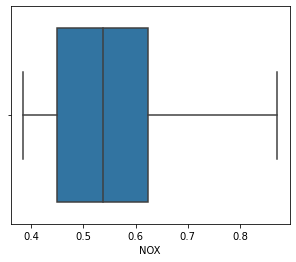

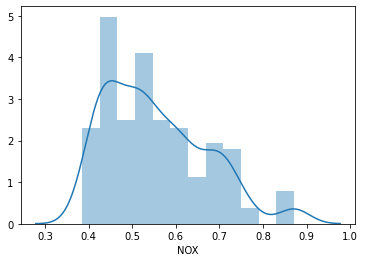

In [8]:
# Box Plot for target variable - NOX 
plt.figure(figsize=(5,4))
sns.boxplot(df.NOX)
plt.show()

# Distribution Plot for target variable - NOX 
sns.distplot(a=df.NOX)
plt.show()

We can observe that is no outlier in `NOX` column with data is positively skewed.

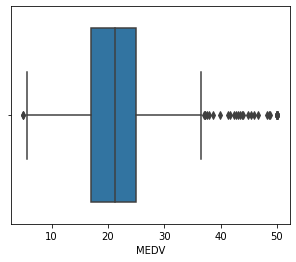

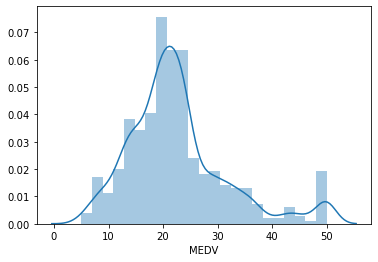

In [9]:
# Box Plot for target variable - MEDV 
plt.figure(figsize=(5,4))
sns.boxplot(df.MEDV)
plt.show()

# Distribution Plot for target variable - MEDV 
sns.distplot(a=df.MEDV)
plt.show()

We can observe their are multiple outlier in `MEDV` column and data is normally distributed.

## Feature Selection and Standardization

#### Creating training and test dataset for model which will predict feature - `NOX` (Nitric oxides concentration)

In [10]:
#Perform scaling and split the dataset for target feature - NOX
X1 = df.drop('NOX', axis = 1)
y1 = df['NOX'].values.reshape(-1, 1)

#Feature Selection to handle multi-collinearity 
X1_best = SelectKBest(f_regression, k=9).fit_transform(X1, y1.ravel())  

# Performing Scaling
standardScale = StandardScaler()
X1 = standardScale.fit_transform(X1_best)

#### Creating training and test dataset for model which will predict feature - `MEDV` (Median home value)

In [65]:
#Perform scaling and split the dataset for target feature - MEDV
X2 = df.drop('MEDV', axis = 1)
y2 = df['MEDV'].values.reshape(-1, 1)

#Feature Selection to handle multi-collinearity 
X2_best = SelectKBest(f_regression, k=9).fit_transform(X2, y2.ravel())  

# Performing Scaling
standardScale = StandardScaler()
X2 = standardScale.fit_transform(X2_best)

## Modelling - To predict  `NOX` 

### Mutli-linear regression

In [90]:
#Spilt the dataset as training and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=45)

#Performing multi-linear regression
lin_reg = LinearRegression()
lin_reg.fit(X1_train, y1_train)
y1_pred = lin_reg.predict(X1_test)

# Root Mean Squared Error for Training set
train_rmse = round(np.sqrt(mean_squared_error(y1_train, lin_reg.predict(X1_train))),4)
print(f'Train-set RMSE: {train_rmse}')

#RMSE of Test dataset
test_rmse = round(np.sqrt(mean_squared_error(y1_test, y1_pred)),4)
print(f'Test-set RMSE: {test_rmse}')

# R_squared of model for test data set
print(f'R_squared : {round(r2_score(y1_test,y1_pred),4)}')

Train-set RMSE: 0.0591
Test-set RMSE: 0.0573
R_squared : 0.7572


### Ridge regression with Regularization 

In [91]:
# Performing hyperparameter tunning using GrideSearchCV to handle high multicollinearity 
parameters = {'alpha': [1e-5, 1e-2, 1, 7, 10, 15]}
ridge_regressor = GridSearchCV(Ridge(), parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X1_train, y1_train)

print(ridge_regressor.best_params_)
print(-ridge_regressor.best_score_)

{'alpha': 10}
0.0036628791058012163


In [92]:
#Performing Ridge regression
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X1_train, y1_train)
y1_pred = ridge_reg.predict(X1_test)

# Root Mean Squared Error for Training set
train_rmse = round(np.sqrt(mean_squared_error(y1_train, ridge_reg.predict(X1_train))),4)
print(f'Train-set RMSE: {train_rmse}')

# RMSE for Test Data
test_rmse = round(np.sqrt(mean_squared_error(y1_test, y1_pred)),4)
print(f'Test-set RMSE: {test_rmse}')

# R_squared of model for test data set
print(f'R_squared: {round(r2_score(y1_test,y1_pred),4)}')

Train-set RMSE: 0.0591
Test-set RMSE: 0.0573
R_squared: 0.7566


### Lasso regression with regularization

In [93]:
# Performing hyperparameter tunning using GrideSearchCV to handle high multicollinearity 
parameters = {'alpha': [1e-15, 1e-9, 1e-3,1, 5, 10]}
lasso_reg = GridSearchCV(Lasso(tol=0.01), parameters, scoring='neg_mean_squared_error', cv=5)
lasso_reg.fit(X1_train, y1_train)

print(lasso_reg.best_params_)
print(-lasso_reg.best_score_)

{'alpha': 0.001}
0.003756756173932373


In [94]:
#Performing lasso regression
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X1_train, y1_train)
y1_pred = lasso_reg.predict(X1_test)

# Root Mean Squared Error for Training set
train_rmse = round(np.sqrt(mean_squared_error(y1_train, lasso_reg.predict(X1_train))),4)
print(f'Train-set RMSE: {train_rmse}')


# RMSE for Test data
test_rmse = round(np.sqrt(mean_squared_error(y1_test, y1_pred)),4)
print(f'Test-set RMSE: {test_rmse}')

# R_squared of model for test data set
print(f'R_squared: {round(r2_score(y1_test,y1_pred),4)}')

Train-set RMSE: 0.0592
Test-set RMSE: 0.0577
R_squared: 0.7538


### Decision-tree Regressor

In [17]:
dec_tree_reg = DecisionTreeRegressor(random_state=45)
dec_tree_reg.fit(X1_train, y1_train)
y1_pred = dec_tree_reg.predict(X1_test)

# Root Mean Squared Error for Training set
train_rmse = round(np.sqrt(mean_squared_error(y1_train, dec_tree_reg.predict(X1_train))),4)
print(f'Train-set RMSE: {train_rmse}')

# Root Mean Squared Error for Training set
test_rmse = round(np.sqrt(mean_squared_error(y1_test, y1_pred)),4)
print(f'Test-set RMSE: {test_rmse}')

#using Cross-Validation 
scores = cross_val_score(dec_tree_reg, X1_train, y1_train, scoring="neg_mean_squared_error", cv=5) 
tree_rmse_scores = np.sqrt(-scores)
print(f'RMSE Score using cross-val: {tree_rmse_scores}')

#R_squared of model for test data set
print(f'R_squared: {round(r2_score(y1_test,y1_pred),4)}')

Train-set RMSE: 0.0
Test-set RMSE: 0.031
RMSE Score using cross-val: [0.05138078 0.06226057 0.04338066 0.04352465 0.0473081 ]
R_squared: 0.9287


According above observation: R_squared value is high but model is also overfit for training dataset. we should perform Hyperparameter tuning to reduce the overfitting with respect to Decision tree model

### Hyperparameter tuning

In [23]:
dtc_params={"max_depth" : [3,5,8],
            "min_samples_split": [3, 5, 7],
           "min_samples_leaf":[1,3,5],
           "min_weight_fraction_leaf":[0.1,0.3,0.5]
          }

dtc_ht=GridSearchCV(dec_tree_reg,dtc_params,scoring='neg_mean_squared_error',cv=3)
dtc_ht.fit(X1_train, y1_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=45),
             param_grid={'max_depth': [3, 5, 8], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [3, 5, 7],
                         'min_weight_fraction_leaf': [0.1, 0.3, 0.5]},
             scoring='neg_mean_squared_error')

In [24]:
# Train RMSE
train_rmse = round(np.sqrt(mean_squared_error(y1_train, dtc_ht.predict(X1_train))),4)
print(f'Train RMSE: {train_rmse}')

y1_pred = dtc_ht.predict(X1_test)
# Test RMSE
test_rmse = round(np.sqrt(mean_squared_error(y1_test, y1_pred)),4)
print(f'Test RMSE: {test_rmse}')

# R_squared of model for test data set
print(f'R_squared: {round(r2_score(y1_test, y1_pred),4)}')


Train RMSE: 0.0542
Test RMSE: 0.0537
R_squared: 0.7867


### Random forest 

In [25]:
rf_reg = RandomForestRegressor(random_state=45)
rf_reg.fit(X1_train, y1_train.ravel()) 
y1_pred = rf_reg.predict(X1_test)

# Train RMSE
train_rmse = round(np.sqrt(mean_squared_error(y1_train, rf_reg.predict(X1_train))),4)
print(f'Train-set RMSE: {train_rmse}')


# Test RMSE
test_rmse = round(np.sqrt(mean_squared_error(y1_test, y1_pred)),4)
print(f'Test-set RMSE: {test_rmse}')

# R_squared of model for test data set
print(f'R_squared: {round(r2_score(y1_test,y1_pred),4)}')

Train-set RMSE: 0.0138
Test-set RMSE: 0.029
R_squared: 0.9379


## Adaboost Regressor

In [27]:
ad_bst = AdaBoostRegressor(random_state=45)
ad_bst.fit(X1_train, y1_train.ravel())
y1_pred = ad_bst.predict(X1_test)

# Train RMSE
train_rmse = round(np.sqrt(mean_squared_error(y1_train, ad_bst.predict(X1_train))),4)
print(f'Train RMSE: {train_rmse}')


# Test RMSE
test_rmse = round(np.sqrt(mean_squared_error(y1_test, y1_pred)),4)
print(f'Test RMSE: {test_rmse}')

# R_squared of model for test data set
print(f'R_squared: {round(r2_score(y1_test, y1_pred),4)}')

Train RMSE: 0.0355
Test RMSE: 0.0403
R_squared: 0.8797


## Gradient Boosting Regressor

In [28]:
gbrt = GradientBoostingRegressor(random_state=45)
gbrt.fit(X1_train, y1_train.ravel())
y1_pred = gbrt.predict(X1_test)

# Train RMSE
train_rmse = round(np.sqrt(mean_squared_error(y1_train, gbrt.predict(X1_train))),4)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = round(np.sqrt(mean_squared_error(y1_test, y1_pred)),4)
print(f'Test RMSE: {test_rmse}')

# R_squared of model for test data set
print(f'R_squared: {round(r2_score(y1_test, y1_pred),4)}')

Train RMSE: 0.0183
Test RMSE: 0.0343
R_squared: 0.9128


### XGBoost Regressor

In [56]:
xgbr = XGBRegressor(random_state=45)
xgbr.fit(X1_train, y1_train.ravel())
y1_pred = xgbr.predict(X1_test)

# Train RMSE
train_rmse = round(np.sqrt(mean_squared_error(y1_train, xgbr.predict(X1_train))),4)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = round(np.sqrt(mean_squared_error(y1_test, y1_pred)),4)
print(f'Test RMSE: {test_rmse}')

# R_squared of model for test data set
print(f'R_squared: {round(r2_score(y1_test, y1_pred),4)}')


Train RMSE: 0.0012
Test RMSE: 0.0315
R_squared: 0.9267


According above observation: R_squared value is high but model is almost overfit. we should perform Hyperparameter tuning to reduce the overfitting with respect to Decision tree model

### Hyperparameter tuning

In [87]:
xgb_params = {
              "learning_rate": [0.03, 0.3],
              "max_depth": [2, 6, 10],
              "n_estimators": [100, 150, 250]
            }

xgb_ht = GridSearchCV(xgbr, xgb_params, scoring='neg_mean_squared_error', cv=3)
xgb_ht.fit(X1_train, y1_train.ravel())

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=45,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
     

In [89]:
# Train RMSE
train_rmse = round(np.sqrt(mean_squared_error(y1_train, xgb_ht.predict(X1_train))),4)
print(f'Train RMSE: {train_rmse}')

y1_pred = xgb_ht.predict(X1_test)
# Test RMSE
test_rmse = round(np.sqrt(mean_squared_error(y1_test, y1_pred)),4)
print(f'Test RMSE: {test_rmse}')

# R_squared of model for test data set
print(f'R_squared: {round(r2_score(y1_test, y1_pred),4)}')

Train RMSE: 0.0006
Test RMSE: 0.0306
R_squared: 0.9308


### Performance evaluation of Model

In [95]:
Perf_eval = {
    'model': ['Linear regression', 'Linear regression + Ridge', 'Linear regression + Lasso', 'Decision Tree',
              'Random Forest','Adaboost Regressor','Gradient Boosting Regressor', 'XGBoost Regressor'],
    'RMSE'      : [0.0573, 0.0573, 0.0577, 0.0537, 0.029, 0.0403,0.0343,0.0306],
    'R_SQUARED' : [0.75726, 0.7566, 0.7538, 0.7867, 0.9379, 0.8797,0.9128,0.9308]
}

eval_df = pd.DataFrame(data=Perf_eval)
eval_df.sort_values(by=['RMSE'], ascending=True)

,model,RMSE,R_SQUARED
4,Random Forest,0.0290,0.93790
7,XGBoost Regressor,0.0306,0.93080
6,Gradient Boosting Regressor,0.0343,0.91280
5,Adaboost Regressor,0.0403,0.87970
3,Decision Tree,0.0537,0.78670
0,Linear regression,0.0573,0.75726
1,Linear regression + Ridge,0.0573,0.75660
2,Linear regression + Lasso,0.0577,0.75380


Text(0.5, 1.0, 'Comparison of Model for predicting - NOX')

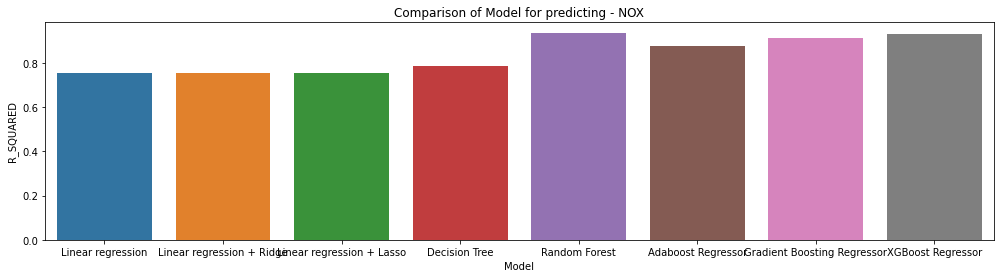

In [102]:
plt.figure(figsize=(17,4))
sns.barplot(x= eval_df['model'],
            y=eval_df['R_SQUARED'],
            data = eval_df
           )
plt.xlabel('Model')
plt.ylabel('R_SQUARED')
plt.title('Comparison of Model for predicting - NOX')

## Modelling - to predict median house price `MEDV`

### Mutli-linear regression

In [39]:
#Spilt the dataset as training and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=45)

#Performing multi-linear regression
lin_reg1 = LinearRegression()
lin_reg1.fit(X2_train, y2_train)
y2_pred = lin_reg1.predict(X2_test)

# Root Mean Squared Error for Training set
train_rmse = round(np.sqrt(mean_squared_error(y2_train, lin_reg1.predict(X2_train))),4)
print(f'Train-set RMSE: {train_rmse}')

#RMSE of Test dataset
test_rmse = round(np.sqrt(mean_squared_error(y2_test, y2_pred)),4)
print(f'Test-set RMSE: {test_rmse}')

# R_squared of model for test data set
print(f'R_squared : {round(r2_score(y2_test,y2_pred),4)}')

Train-set RMSE: 4.9709
Test-set RMSE: 5.2967
R_squared : 0.7231


### Ridge regression with Regularization

In [40]:
# Performing hyperparameter tunning using GrideSearchCV to handle high multicollinearity 
parameters = {'alpha': [1e-6, 1e-4, 1e-2, 1, 5, 15, 20]}
ridge_reg1 = GridSearchCV(Ridge(), parameters, scoring='neg_mean_squared_error', cv=3)
ridge_reg1.fit(X2_train, y2_train)

print(ridge_reg1.best_params_)
print(-ridge_reg1.best_score_)

{'alpha': 5}
27.1889261346326


In [41]:
#Performing Ridge regression
ridge_reg1 = Ridge(alpha=5)
ridge_reg1.fit(X2_train, y2_train)
y2_pred = ridge_reg1.predict(X2_test)

# Root Mean Squared Error for Training set
train_rmse = round(np.sqrt(mean_squared_error(y2_train, ridge_reg1.predict(X2_train))),4)
print(f'Train-set RMSE: {train_rmse}')

# RMSE for Test Data
test_rmse = round(np.sqrt(mean_squared_error(y2_test, y2_pred)),4)
print(f'Test-set RMSE: {test_rmse}')

# R_squared of model for test data set
print(f'R_squared: {round(r2_score(y2_test,y2_pred),4)}')

Train-set RMSE: 4.9745
Test-set RMSE: 5.3003
R_squared: 0.7227


### Lasso regression with regularization

In [44]:
# Performing hyperparameter tunning using GrideSearchCV to handle high multicollinearity 
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_reg1 = GridSearchCV(Lasso(tol=0.05), parameters, scoring='neg_mean_squared_error', cv=5, n_jobs = -1)
lasso_reg1.fit(X2_train, y2_train)

print(lasso_reg1.best_params_)
print(-lasso_reg1.best_score_)

{'alpha': 0.001}
26.718254003895517


In [49]:
#Performing lasso regression
lasso_reg1 = Lasso(alpha=0.001)
lasso_reg1.fit(X2_train, y2_train)
y2_pred = lasso_reg1.predict(X2_test)

# Root Mean Squared Error for Training set
train_rmse = round(np.sqrt(mean_squared_error(y2_train, lasso_reg1.predict(X2_train))),4)
print(f'Train-set RMSE: {train_rmse}')


# RMSE for Test data
test_rmse = round(np.sqrt(mean_squared_error(y2_test, y2_pred)),4)
print(f'Test-set RMSE: {test_rmse}')

# R_squared of model for test data set
print(f'R_squared: {round(r2_score(y2_test,y2_pred),4)}')

Train-set RMSE: 4.9709
Test-set RMSE: 5.297
R_squared: 0.7231


### Decision-tree based models 

In [50]:
dec_tree_reg1 = DecisionTreeRegressor(random_state=45)
dec_tree_reg1.fit(X2_train, y2_train)
y2_pred = dec_tree_reg1.predict(X2_test)

# Root Mean Squared Error for Training set
train_rmse = round(np.sqrt(mean_squared_error(y2_train, dec_tree_reg1.predict(X2_train))),4)
print(f'Train-set RMSE: {train_rmse}')


# Root Mean Squared Error for Training set
test_rmse = round(np.sqrt(mean_squared_error(y2_test, y2_pred)),4)
print(f'Test-set RMSE: {test_rmse}')

#using Cross-Validation 
scores = cross_val_score(dec_tree_reg, X2_train, y2_train, scoring="neg_mean_squared_error", cv=5) 
tree_rmse_scores = np.sqrt(-scores)
print(f'RMSE Score using cross-val: {tree_rmse_scores}')

#R_squared of model for test data set
print(f'R_squared: {round(r2_score(y2_test,y2_pred),4)}')

Train-set RMSE: 0.0
Test-set RMSE: 4.6875
RMSE Score using cross-val: [4.99379879 6.14941161 4.71620945 3.70412288 4.95946234]
R_squared: 0.7831


### Random forest  Regressor

In [51]:
rf1 = RandomForestRegressor(random_state=45)
rf1.fit(X2_train, y2_train.ravel()) 
y2_pred = rf1.predict(X2_test)

# Train RMSE
train_rmse = round(np.sqrt(mean_squared_error(y2_train, rf1.predict(X2_train))),4)
print(f'Train-set RMSE: {train_rmse}')

# Test RMSE
test_rmse = round(np.sqrt(mean_squared_error(y2_test, y2_pred)),4)
print(f'Test-set RMSE: {test_rmse}')

# R_squared of model for test data set
print(f'R_squared: {round(r2_score(y2_test,y2_pred),4)}')

Train-set RMSE: 1.3002
Test-set RMSE: 3.6582
R_squared: 0.8679


### Gradient Boosting Regressor

In [52]:
gbr1 = GradientBoostingRegressor(random_state=45)
gbr1.fit(X2_train, y2_train.ravel())
y2_pred = gbr1.predict(X2_test)

# Train RMSE
train_rmse = round(np.sqrt(mean_squared_error(y2_train, gbr1.predict(X2_train))),4)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = round(np.sqrt(mean_squared_error(y2_test, y2_pred)),4)
print(f'Test RMSE: {test_rmse}')

# R_squared of model for test data set
print(f'R_squared: {round(r2_score(y2_test, y2_pred),4)}')

Train RMSE: 1.5023
Test RMSE: 3.3635
R_squared: 0.8884


### XGBoost Regressor

In [61]:
xgbr1 = XGBRegressor(random_state=45)
xgbr1.fit(X2_train, y2_train.ravel())
y2_pred = xgbr1.predict(X2_test)

# Train RMSE
train_rmse = round(np.sqrt(mean_squared_error(y2_train, xgbr1.predict(X2_train))),4)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = round(np.sqrt(mean_squared_error(y2_test, y2_pred)),4)
print(f'Test RMSE: {test_rmse}')

# R_squared of model for test data set
print(f'R_squared: {round(r2_score(y2_test, y2_pred),4)}')


Train RMSE: 0.0277
Test RMSE: 3.3761
R_squared: 0.8875


According above observation: R_squared value is high but model is almost overfit. we should perform Hyperparameter tuning to reduce the overfitting with respect to Decision tree model

### Hyperparameter tuning

In [62]:
xgb1_params = {
              "learning_rate": [0.03, 0.3],
              "max_depth": [2, 6, 10],
              "n_estimators": [100, 150, 250],
            }

xgb1_ht = GridSearchCV(xgbr1, xgb1_params, scoring='neg_mean_squared_error', cv=3)
xgb1_ht.fit(X2_train, y2_train.ravel())

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=45,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
     

In [63]:
#Train RMSE
train_rmse = round(np.sqrt(mean_squared_error(y2_train, xgb1_ht.predict(X2_train))),4)
print(f'Train RMSE: {train_rmse}')

y2_pred = xgb1_ht.predict(X2_test)
# Test RMSE
test_rmse = round(np.sqrt(mean_squared_error(y2_test, y2_pred)),4)
print(f'Test RMSE: {test_rmse}')

# R_squared of model for test data set
print(f'R_squared: {round(r2_score(y2_test, y2_pred),4)}')

Train RMSE: 0.5879
Test RMSE: 3.152
R_squared: 0.9019


### Performance evaluation of Model

In [100]:
Per_eval = {
    'model': ['Linear regression', 'Linear regression + Ridge', 'Linear regression + Lasso', 'Decision Tree',
              'Random Forest','Gradient Boosting Regressor','XGBoost Regressor'],
    'RMSE'      : [5.2967, 5.3003, 5.297, 4.6875, 3.6582,3.3635, 3.152],
    'R_SQUARED' : [0.7231, 0.7227, 0.7231, 0.7831, 0.8679, 0.8884, 0.9019]
}


eva_df = pd.DataFrame(data=Per_eval)
eva_df.sort_values(by=['RMSE'], ascending=True)

,model,RMSE,R_SQUARED
6,XGBoost Regressor,3.1520,0.9019
5,Gradient Boosting Regressor,3.3635,0.8884
4,Random Forest,3.6582,0.8679
3,Decision Tree,4.6875,0.7831
0,Linear regression,5.2967,0.7231
2,Linear regression + Lasso,5.2970,0.7231
1,Linear regression + Ridge,5.3003,0.7227


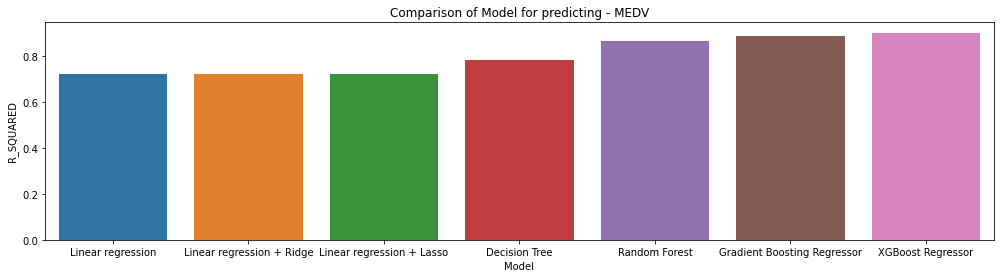

In [101]:
plt.figure(figsize=(17,4))
sns.barplot(x= eva_df['model'],
            y=eva_df['R_SQUARED'],
            data = eva_df
           )
plt.xlabel('Model')
plt.ylabel('R_SQUARED')
plt.title('Comparison of Model for predicting - MEDV')
plt.show()